# Capstone project: Providing data-driven suggestions for HR

### Business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

In [4]:
# Import packages
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:

df0 = pd.read_csv("/kaggle/input/projectx/HR_capstone_dataset.csv")


df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [6]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Descriptive statistics about the data

In [7]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Renaming columns

In [8]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
# Renaming columns as needed
df0.rename(columns={'satisfaction_level': 'satisfaction',
                   'number_project':'projects',
                    'average_montly_hours': 'average_monthly_hours',
                     'time_spend_company':'time_spent',
                      'work_accident':'has_work_accident',
                       'promotion_last_5years':'has_promotion_last_5years',
                        'Department':'department'}, inplace=True)



### Check missing values

In [10]:
# Checking for missing values
df0.isnull().sum()

satisfaction                 0
last_evaluation              0
projects                     0
average_monthly_hours        0
time_spent                   0
Work_accident                0
left                         0
has_promotion_last_5years    0
department                   0
salary                       0
dtype: int64

### Check duplicates

In [11]:
# Checking for duplicates
df0.duplicated().sum()

3008

In [12]:
# Inspecting some rows containing duplicates as needed
df0[df0.duplicated()]

,satisfaction,last_evaluation,projects,average_monthly_hours,time_spent,Work_accident,left,has_promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [13]:
# Droping duplicates and saving resulting dataframe 
df0 = df0.drop_duplicates()

df0.head(5)

,satisfaction,last_evaluation,projects,average_monthly_hours,time_spent,Work_accident,left,has_promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

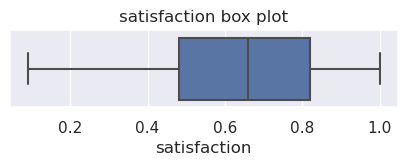

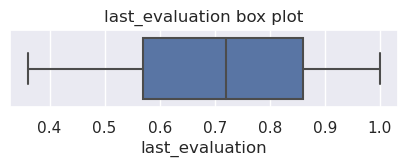

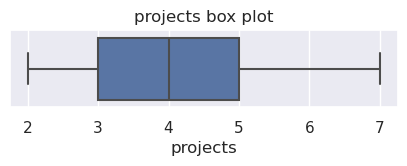

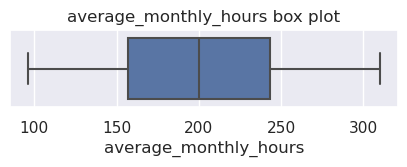

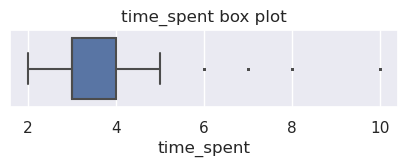

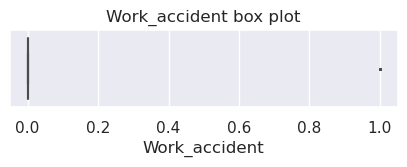

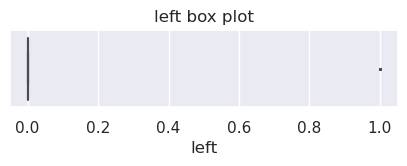

In [14]:
# Creating a boxplot to visualize distributions and detect any outliers
numerical_cols = df0.iloc[:,:7]
for col in numerical_cols[numerical_cols.columns]:
    plt.figure(figsize=(5,1))
    sns.boxplot(x=numerical_cols[col], fliersize=1)
    plt.title( f'{col} box plot');


In [15]:
#number of rows containing outliers

df0[df0["time_spent"]>= 6]

,satisfaction,last_evaluation,projects,average_monthly_hours,time_spent,Work_accident,left,has_promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


In [16]:
df0 = df0.sort_values(by='satisfaction', ascending=True)

In [17]:
df0.head(10)

,satisfaction,last_evaluation,projects,average_monthly_hours,time_spent,Work_accident,left,has_promotion_last_5years,department,salary
1138,0.09,0.92,6,303,5,0,1,0,sales,low
1680,0.09,0.96,7,274,5,0,1,0,marketing,low
140,0.09,0.96,6,245,4,0,1,0,IT,low
1675,0.09,0.93,6,255,4,0,1,0,RandD,medium
445,0.09,0.94,6,283,5,0,1,0,IT,low
1655,0.09,0.90,6,256,4,0,1,0,support,low
527,0.09,0.90,7,289,4,0,1,0,product_mng,low
528,0.09,0.80,6,301,5,0,1,0,IT,medium
761,0.09,0.93,6,249,4,0,1,0,sales,low
1643,0.09,0.83,6,295,5,0,1,0,technical,low


In [18]:
# numbers of people who left vs. stayed
print("people who left vs. stayed")
print("How many?")
print(df0["left"].value_counts())

# Percentages of people who left vs. stayed
print("In what percentages?")
print(df0["left"].value_counts() / len(df0["left"]) * 100)

people who left vs. stayed
How many?
0    10000
1     1991
Name: left, dtype: int64
In what percentages?
0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

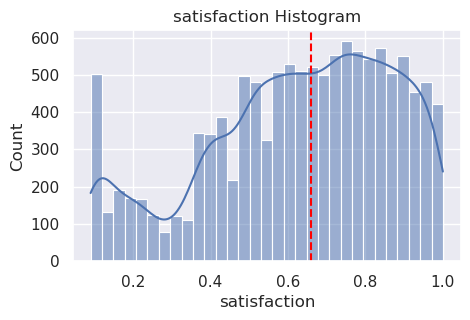

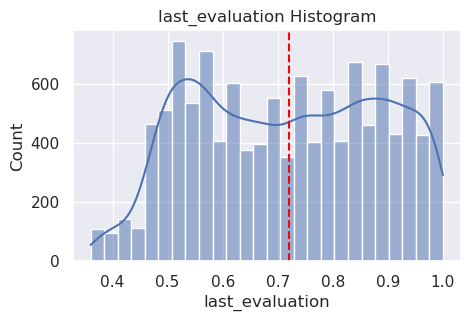

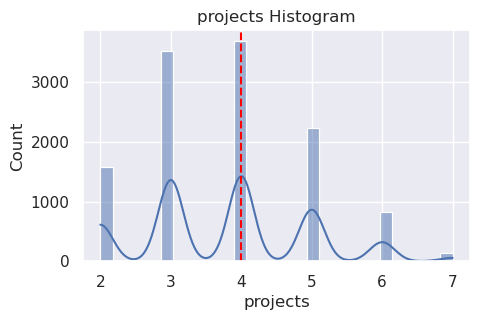

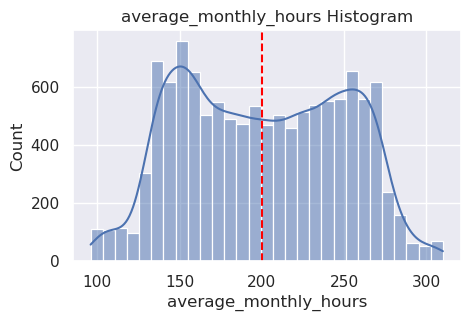

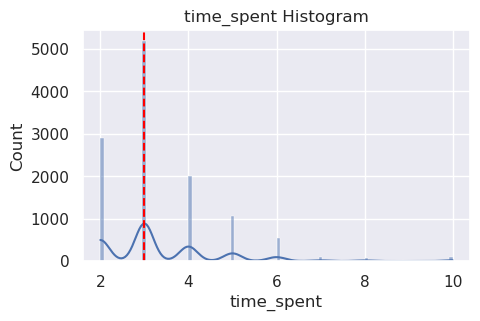

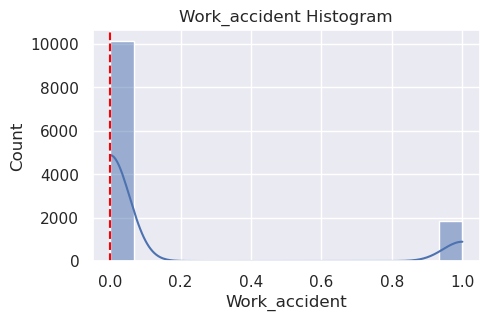

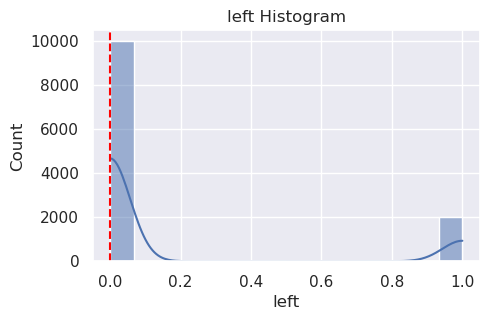

In [19]:
for col in numerical_cols.columns:
    plt.figure(figsize=(5, 3))  
    sns.histplot(numerical_cols[col], kde=True )
    median = df0[col].median()
    plt.axvline(median, color='red', linestyle='--')
    plt.title(f'{col} Histogram')
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


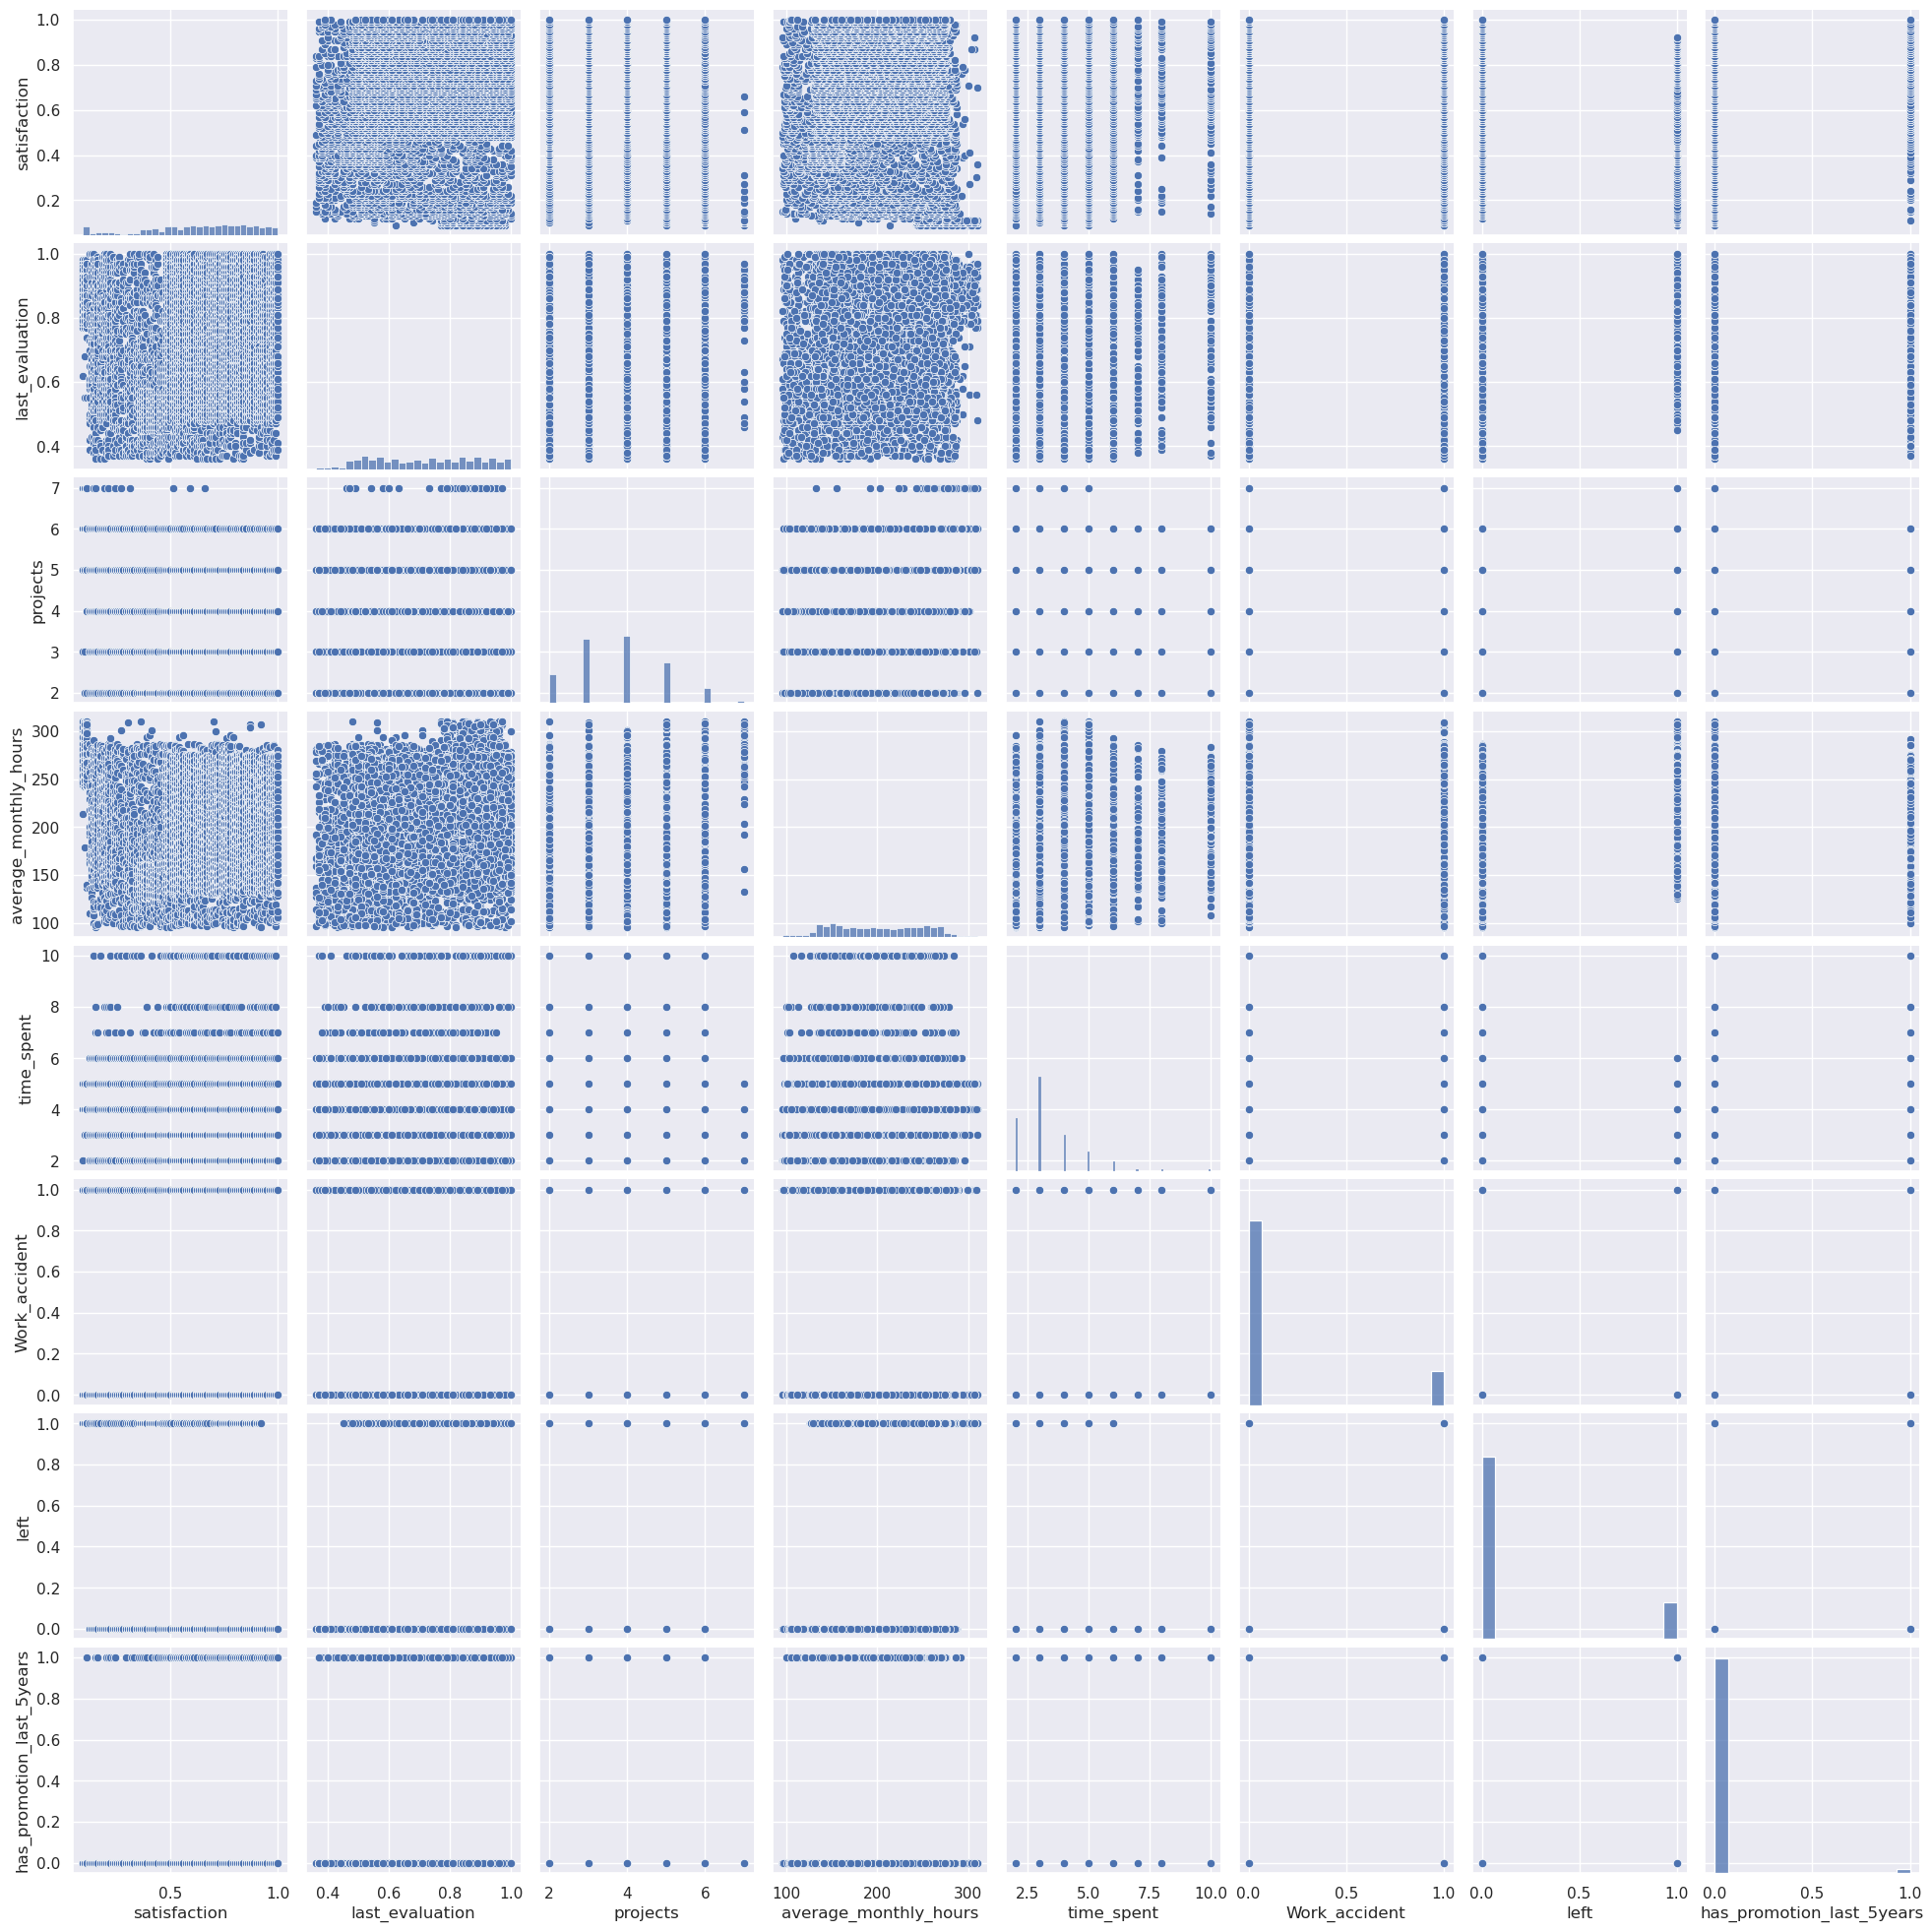

In [20]:
sns.pairplot(df0)

In [21]:
# What is the mean satisfaction , last evaluation , average monthly hours and time spent of each employee who left and who doesn't?
df0.groupby("left")[['satisfaction', 'last_evaluation', 'average_monthly_hours',
       'time_spent']].mean()

,satisfaction,last_evaluation,average_monthly_hours,time_spent
left,,,,
0,0.667365,0.715667,198.94270,3.262000
1,0.440271,0.721783,208.16223,3.881467


In [22]:
# What is the mean satisfaction , last evaluation , average monthly hours and time spent in each category of salary?
df0.groupby("salary")[['satisfaction', 'last_evaluation', 'average_monthly_hours',
       'time_spent']].mean()

,satisfaction,last_evaluation,average_monthly_hours,time_spent
salary,,,,
high,0.643343,0.706838,200.067677,3.493939
low,0.622655,0.718512,200.439199,3.319686
medium,0.634723,0.716539,200.587341,3.389850


In [23]:
# What is the mean satisfaction , last evaluation , average monthly hours and time spent in each department?
df0.groupby("department")[['satisfaction', 'last_evaluation', 'average_monthly_hours',
       'time_spent']].mean()

,satisfaction,last_evaluation,average_monthly_hours,time_spent
department,,,,
IT,0.634016,0.715051,200.638320,3.350410
RandD,0.627176,0.712983,201.291066,3.319885
accounting,0.607939,0.721900,200.877617,3.404187
hr,0.621947,0.715691,199.371048,3.256240
management,0.631995,0.726307,201.529817,3.981651
marketing,0.634770,0.718440,199.487370,3.421991
product_mng,0.629825,0.713790,198.893586,3.341108
sales,0.631349,0.710398,200.242050,3.380673
support,0.634822,0.722998,200.627128,3.292696


In [24]:
#How many employees left in each department?
df0.groupby("department")["left"].sum()

department
IT             158
RandD           85
accounting     109
hr             113
management      52
marketing      112
product_mng    110
sales          550
support        312
technical      390
Name: left, dtype: int64

In [25]:
df0.groupby("salary")["satisfaction"].mean()  
#are the differences statistically significant?#######

salary
high      0.643343
low       0.622655
medium    0.634723
Name: satisfaction, dtype: float64

In [26]:
groups = []
for salary, group in df0.groupby('salary')['satisfaction']:
    groups.append(group)

result = f_oneway(*groups)
alpha = 0.05
if result.pvalue < alpha:
    print("There are significant differences in satisfaction means among salary categories.")
else:
    print("There are no significant differences in satisfaction means among salary categories.")

There are significant differences in satisfaction means among salary categories.


In [27]:
#what is the salary of each employee who left?
df0.groupby("salary")["left"].sum()

salary
high        48
low       1174
medium     769
Name: left, dtype: int64

In [28]:
# what is the mode salary of each of the departments?
df0.groupby('department')['salary'].apply(lambda x: x.mode().iloc[0]).reset_index()

,department,salary
0,IT,low
1,RandD,medium
2,accounting,low
3,hr,low
4,management,medium
5,marketing,low
6,product_mng,low
7,sales,low
8,support,low
9,technical,low


<Axes: xlabel='last_evaluation', ylabel='average_monthly_hours'>

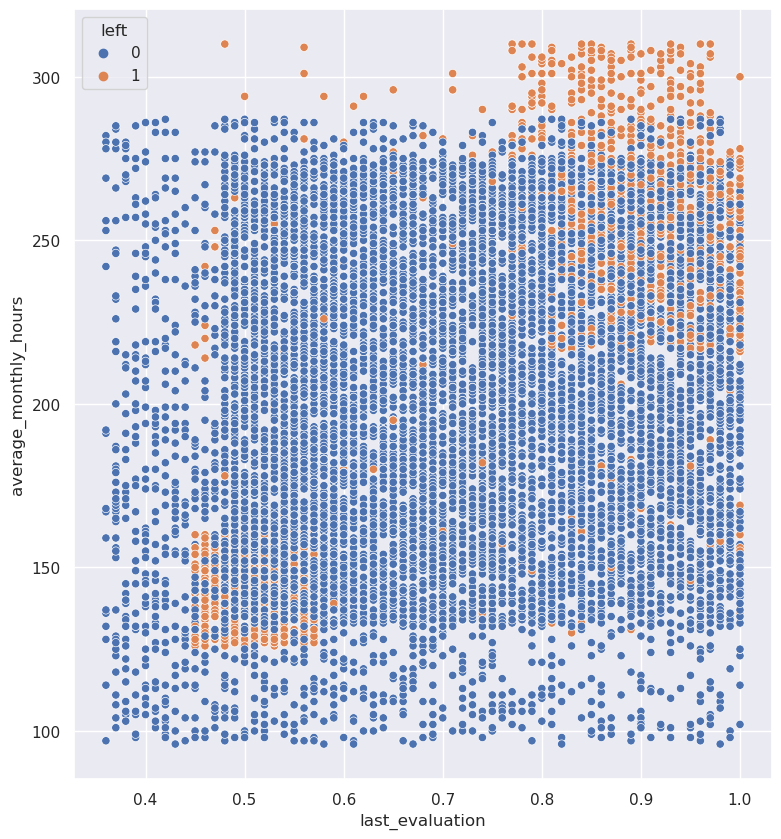

In [29]:
plt.figure(figsize=(9,10))
sns.scatterplot(x=df0["last_evaluation"],y=df0["average_monthly_hours"],hue=df0["left"] )

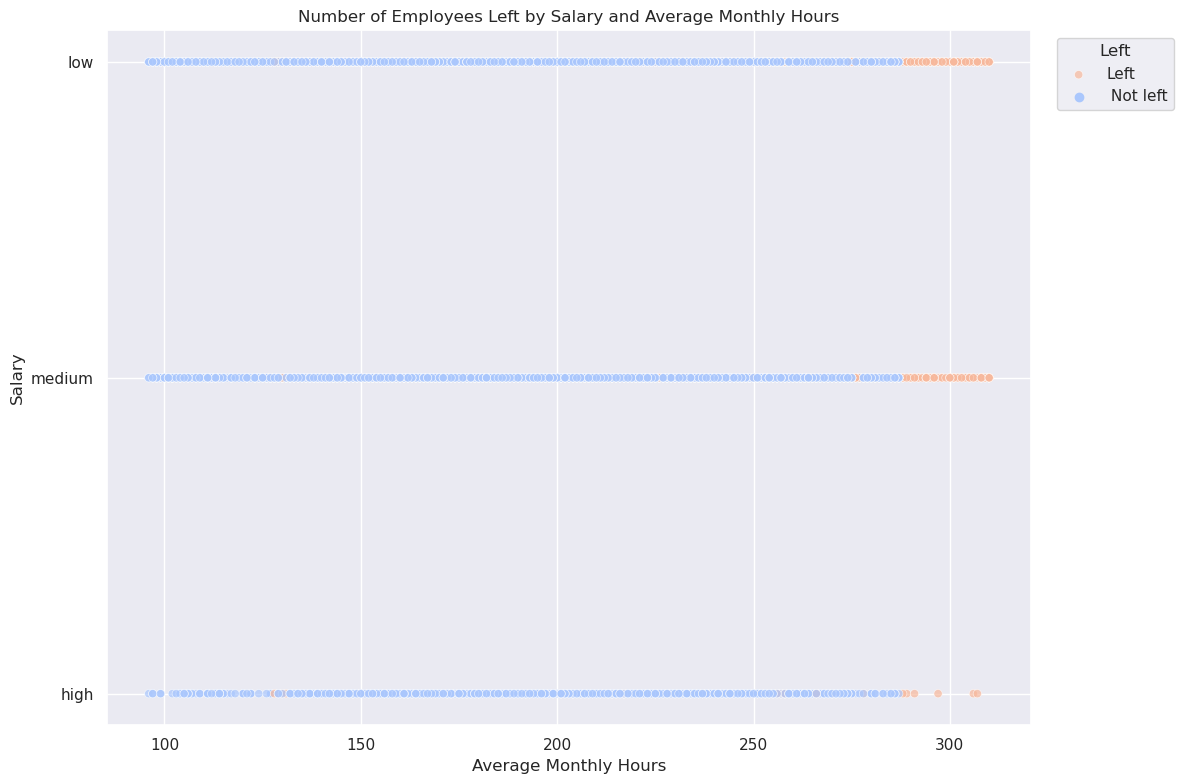

In [30]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df0, x='average_monthly_hours', y='salary', hue='left', palette='coolwarm', alpha=0.7)
plt.xlabel("Average Monthly Hours")
plt.ylabel("Salary")
plt.title("Number of Employees Left by Salary and Average Monthly Hours")
plt.legend(title="Left", labels=["Left", " Not left"], loc='upper left', bbox_to_anchor=(1.02, 1.0))

plt.tight_layout()
plt.show()

In [31]:
from scipy.stats import pointbiserialr
correlation_coefficient, p_value = pointbiserialr(df0['average_monthly_hours'], df0['left'])
alpha = 0.05  
if p_value < alpha:
    print("There is a statistically significant relationship between the two variables.")
else:
    print("There is no statistically significant relationship between the two variables.")

There is a statistically significant relationship between the two variables.


In [32]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df0['salary'], df0['left'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05

if p_value < alpha:
    print("There is a statistically significant relationship between the salary and the left variable.")
else:
    print("There is no statistically significant relationship between the salary and the left variable.")

There is a statistically significant relationship between the salary and the left variable.


In [33]:
# how many hours work the majority of people who left?
mask_left = df0["left"] == 1

mask_salary = (df0["salary"] == "medium") | (df0["salary"] == "low")

combined_mask = mask_left & mask_salary

df0["average_monthly_hours"][combined_mask].mean()

208.29027277406072

In [34]:
from scipy.stats import pearsonr
correlation_coefficient, p_value = pearsonr(df0['has_promotion_last_5years'], df0['satisfaction'])

alpha = 0.05  
if p_value < alpha:
    print("There is a statistically significant relationship between has_promotion_last_5years and satisfaction.")
else:
    print("There is no statistically significant relationship between has_promotion_last_5years and satisfaction  .")

There is a statistically significant relationship between has_promotion_last_5years and satisfaction.


In [35]:
correlation_coefficient, p_value = pearsonr(df0['last_evaluation'], df0['satisfaction'])

alpha = 0.05  
if p_value < alpha:
    print("There is a statistically significant relationship between last_evaluation and satisfaction.")
else:
    print("There is no statistically significant relationship between last_evaluation and satisfaction  .")

There is a statistically significant relationship between last_evaluation and satisfaction.


In [36]:
correlation_coefficient, p_value = pearsonr(df0['last_evaluation'], df0['average_monthly_hours'])

alpha = 0.05  
if p_value < alpha:
    print("There is a statistically significant relationship between last_evaluation and average_monthly_hours.")
else:
    print("There is no statistically significant relationship between last_evaluation and average_monthly_hours  .")

There is a statistically significant relationship between last_evaluation and average_monthly_hours.


In [37]:
correlation_coefficient, p_value = pearsonr(df0['left'], df0['satisfaction'])

alpha = 0.05  
if p_value < alpha:
    print("There is a statistically significant relationship between left and satisfaction.")
else:
    print("There is no statistically significant relationship between left and satisfaction .")

There is a statistically significant relationship between left and satisfaction.


/tmp/ipykernel_32/489355462.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df0.corr()


<Axes: >

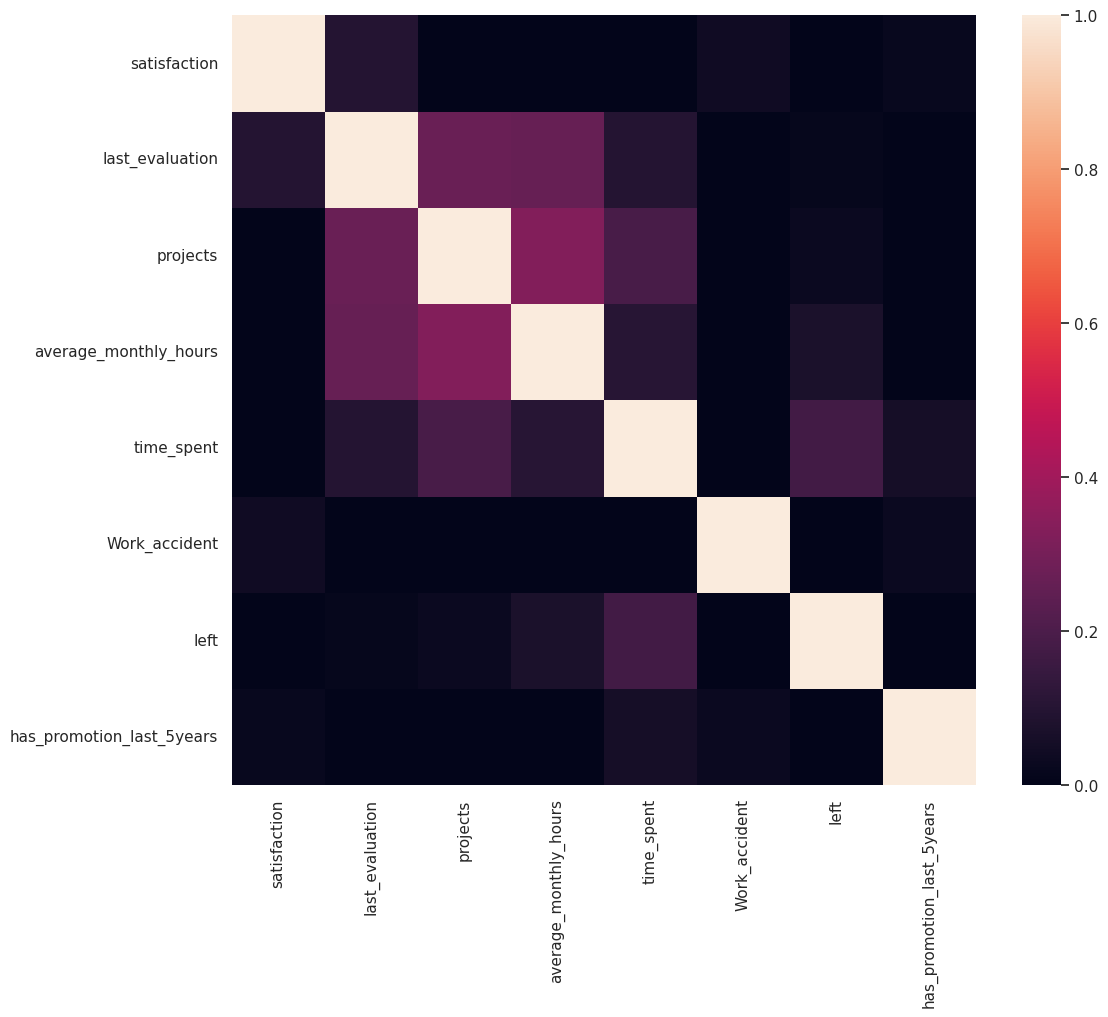

In [38]:
plt.figure(figsize=(12,10))
corr = df0.corr()
sns.heatmap(corr, vmin=0, vmax=1)

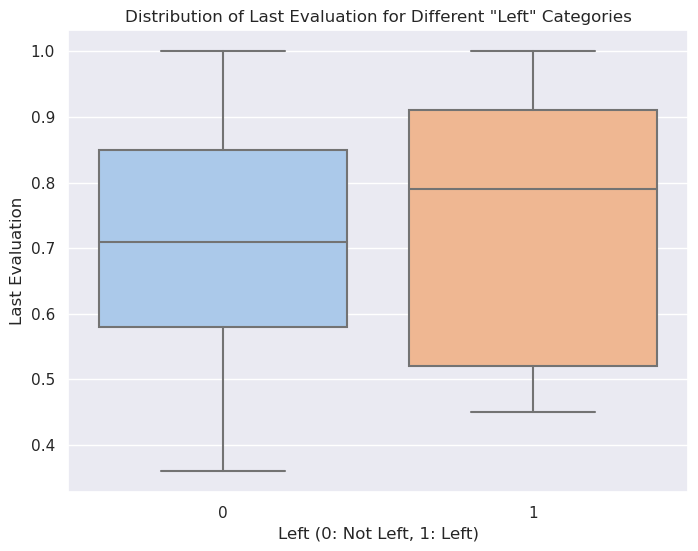

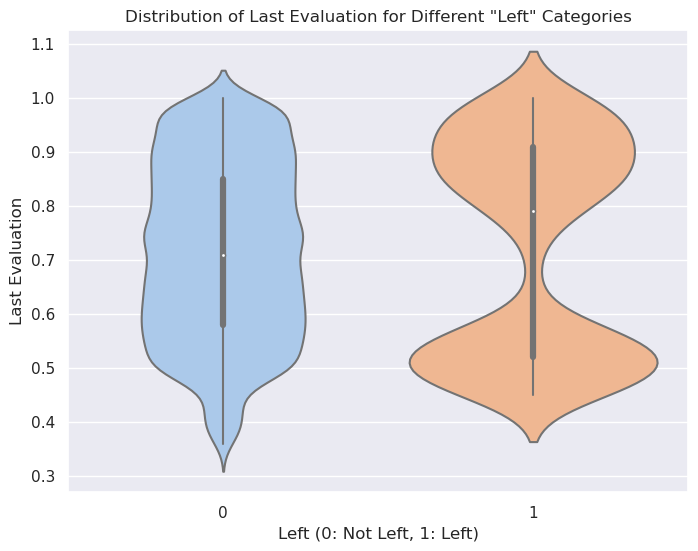

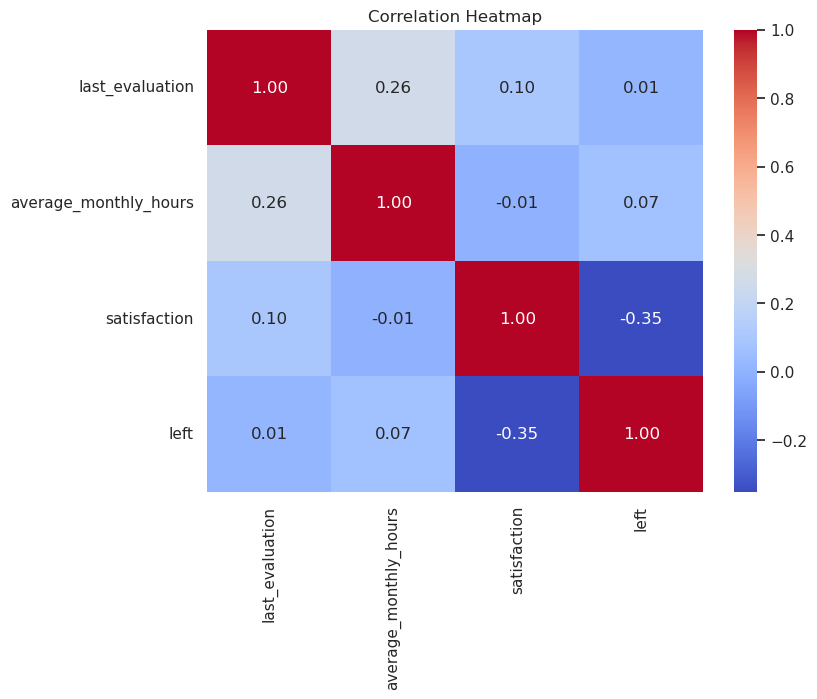

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='left', y='last_evaluation', data=df0, palette='pastel')
plt.xlabel('Left (0: Not Left, 1: Left)')
plt.ylabel('Last Evaluation')
plt.title('Distribution of Last Evaluation for Different "Left" Categories')
plt.show()


plt.figure(figsize=(8, 6))
sns.violinplot(x='left', y='last_evaluation', data=df0, palette='pastel')
plt.xlabel('Left (0: Not Left, 1: Left)')
plt.ylabel('Last Evaluation')
plt.title('Distribution of Last Evaluation for Different "Left" Categories')
plt.show()

correlation_matrix = df0[['last_evaluation', 'average_monthly_hours', 'satisfaction', 'left']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Insights

* 59% of people who left have a low salary and almost 39% have a medium one.
* The majority of people who left are in technical(19,58% of all employees who left) , support(15,67% of all employees who left) and especially the sales department (27,62% of all employees who left); and the most frequent salary in all these three is low  .
* There is a statistically significant relationship between last_evaluation and satisfaction.
* There is a statistically significant relationship between last_evaluation and average_monthly_hours.
* There is a statistically significant relationship between has_promotion_last_5years and satisfaction.
* There is a statistically significant relationship between left and satisfaction.
* There are significant differences in satisfaction means among salary categories(low,medium, high).
* There is a statistically significant relationship between average monthly hours and employees who left.
* There is a statistically significant relationship between the salary and the left variable.
* The employees who left are divided into two groups : low evaluations and the majority who have higher evaluations.
* The majority of employees who left have a high evaluation but their working hours are more than average.


------------------------------------------------------------------------------------------------------------------

<b><span style="font-size: 24px;">As a conclusion: the majority of employees who left are working on average  208 hours , and they have low salary (59%) and medium salary (39%); And the most affected department is Sales.</span></b>


-------------------------------------------------------------------------------------------------------------------

### Modeling



In [40]:
### YOUR CODE HERE ###
from sklearn.model_selection import PredefinedSplit, cross_val_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance


In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df0['salary'] = label_encoder.fit_transform(df0['salary'])
df0 = pd.get_dummies(df0, columns=['department'], drop_first=True)

In [42]:

X = df0.drop("left", axis=1)
y = df0["left"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25,random_state = 0)


In [43]:
models = {
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=0),
    "RandomForestClassifier": RandomForestClassifier(random_state=0),
    "XGBClassifier": XGBClassifier(objective='binary:logistic',random_state=0)
}

# Define hyperparameter grids for each model
cv_param = {
    "DecisionTreeClassifier": {'max_depth': [3, 5, 7]},
    "RandomForestClassifier": {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]},
    "XGBClassifier": {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}
}
scoring = {'accuracy', 'precision', 'recall', 'f1'}
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [44]:
best_params_dict = {}  # Dictionary to store the best hyperparameters of each model

for model_name, model in models.items():
    model_gs = GridSearchCV(model, cv_param[model_name], scoring=scoring, cv=custom_split, refit='f1')
    model_gs.fit(X_train, y_train)
    best_model = model_gs.best_estimator_

    # Store the best hyperparameters of each model in the dictionary
    best_params_dict[model_name] = model_gs.best_params_

    # Evaluate the model on validation set
    y_val_pred = best_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred)
    val_recall = recall_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred)

    print(f"Model: {model_name}")
    print(f"Validation Accuracy: {val_accuracy:.4f}, Validation Precision: {val_precision:.4f}, Validation Recall: {val_recall:.4f}, Validation F1: {val_f1:.4f}")
    print("---------------------------------------------------------")



best_params_xgb = best_params_dict["XGBClassifier"]
print("Best Hyperparameters for XGBoostClassifier:")
print(best_params_xgb)



Model: DecisionTreeClassifier
Validation Accuracy: 0.9880, Validation Precision: 0.9915, Validation Recall: 0.9360, Validation F1: 0.9630
---------------------------------------------------------
Model: RandomForestClassifier
Validation Accuracy: 0.9844, Validation Precision: 0.9913, Validation Recall: 0.9147, Validation F1: 0.9515
---------------------------------------------------------
Model: XGBClassifier
Validation Accuracy: 0.9911, Validation Precision: 0.9917, Validation Recall: 0.9547, Validation F1: 0.9728
---------------------------------------------------------
Best Hyperparameters for XGBoostClassifier:
{'max_depth': 3, 'n_estimators': 300}


In [45]:
XGB_optimal = XGBClassifier(max_depth=3, n_estimators=300,random_state=1)
XGB_optimal.fit(X_train, y_train)
y_pred = XGB_optimal.predict(X_test)
pc_test = precision_score(y_test, y_pred)
print("The precision score is {pc:.3f}".format(pc = pc_test))
rc_test = recall_score(y_test, y_pred)
print("The recall score is {rc:.3f}".format(rc = rc_test))
ac_test = accuracy_score(y_test, y_pred)
print("The accuracy score is {ac:.3f}".format(ac = ac_test))
f1_test = f1_score(y_test, y_pred)
print("The F1 score is {f1:.3f}".format(f1 = f1_test))

The precision score is 0.953
The recall score is 0.924
The accuracy score is 0.980
The F1 score is 0.939


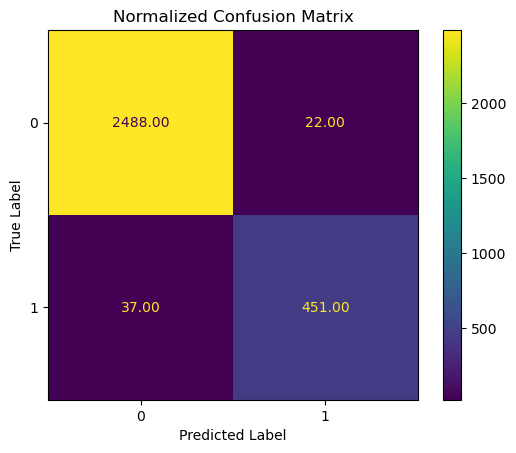

In [71]:
cm = confusion_matrix(y_test, y_pred, labels=XGB_optimal.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGB_optimal.classes_)
disp.plot( cmap='viridis',include_values=True, xticks_rotation='horizontal' , values_format='.2f')
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## So our model is more likely to make false negatives than false positives

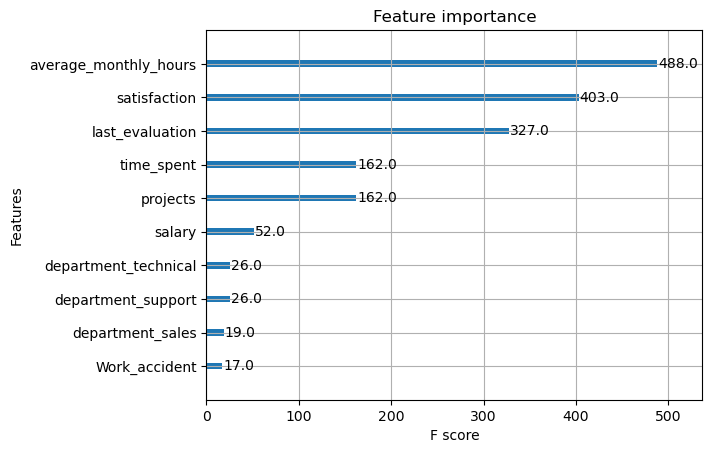

In [72]:
plot_importance(XGB_optimal, max_num_features=10);

## Step 4. Results and Evaluation



### Conclusion, Recommendations, Next Steps

So as a conclusion of this project: 
* The best model was XGBoostClassifier with an  accuracy score(98%),  precision score(95.3%),F1 score (93.9%) and the most important metric in our case because we want to reduce false negative is recall score (0.924%).
* we also discrovered  that the variable that determine the most  if the employee will leave or not are : average_monthly_hours, satisfaction and last_evaluation.





We recommend to the stakeholders the following actions to retain the employees:

    * Improve employees satisfaction by augmenting their salaries (which is an important factor of satisfaction).
    * Provide more promotions, especially for employees who have high evaluations.
    * Reduce working hours, at least to the average.
    * Offer training and development opportunities for employees who do not perform well (low evaluations)

The next steps are :
* Gathering more information about the employees to find out if there are other factors that can influence left variable.
* Searching for additional sources of employee satisfaction.
* Attempting to improve model performance.
